# BITAmin 11기 3차 정규세션 실습과제 (2023.03.08)

## **주제 : t-검정, 분산 분석, 상관 분석**

실습 진행 전, 다음 코드를 실행해주세요.

In [ ]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd
import scipy as sp

# 통계 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 실습 1

## Q1.
농구를 좋아하는 A는 어느 날, 문득 NBA 선수들의 평균 키가 궁금해졌다.

오래 시청한 감으로 봤을 때 2m 정도 되어보였으나, 자신의 생각이 맞는지 확인하기 위해 임의로 15명의 선수 키를 찾아 정리해보았다.

아래 데이터를 통해 NBA 선수들의 평균 키가 2m라고 할 수 있을지 알아보자.

아래 코드를 실행하시오.

In [ ]:
# 알려진 평균
mu = 200
# 수집된 표본
height_data = [210,215,190,200,185,190,200,
       205,205,192,193,191,201,201,204]
height_data_arr = np.array(height_data)

**Q1-1. 귀무가설, 대립가설 설정**

위 문제의 귀무가설과 대립가설을 작성하시오.

In [ ]:
# 귀무가설 : 선수들의 키 평균은 200cm이다.
# 대립가설 : 선수들의 키 평균은 200cm가 아니다.

**Q1-2. 정규성 검정**

정규성 검정을 수행하고, p-value값을 해석하시오.

그리고, 이 데이터에서 왜 정규성 검정을 수행해야 하는지 서술하시오.

In [ ]:
# shapiro 함수 활용
stats.shapiro(height_data_arr)

In [ ]:

#p-value 해석 : p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못하고 정규성을 만족한다고 판단한다.
#정규성을 기본 가정으로 하는 t검정에대해 표본의 개수가 30개 이하인 소표본은 중심극한정리로 정규성을 만족함을 보일 수 없기 때문이다.

**Q1-3. One-Sample T-test 수행**

height_data_arr 데이터프레임을 기반으로 One-sample T-test를 수행하고, 결과값을 출력하시오.

In [ ]:
# one-sample t-test
one_sample = stats.ttest_1samp(height_data_arr, 200)
print(f"t-value : {one_sample[0]} \np-value : {one_sample[1]}")

t-value : -0.5525678051800346 
p-value : 0.5892734756296947


In [ ]:
#결과값 해석 : p-value가 유의수준인 0.05보다 크므로 귀무가설을 기각할 수 없어 선수들의 키의 평균이 200cm라 판단한다.

### Q2.
아래 데이터는 대구지역 초등학교 1학년과 서울지역 초등학교 1학년의 키를 정리한 자료이다.

아래 데이터를 통해 대구지역 초등학교 1학년과 서울지역 초등학교 1학년의 키에 유의미한 차이가 있는지 알아보자.

**Q2-1. 데이터 불러오기**

'height.csv'를 불러오고, 이를 height 변수에 저장하시오.

In [ ]:
# 데이터 불러오기
height = pd.read_csv("/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/실습과제/data/height.csv")

FileNotFoundError: ignored

**Q2-2. 귀무가설, 대립가설 설정**

위 문제의 귀무가설과 대립가설을 서술하시오.

In [ ]:
# 귀무가설 : 대구지역 초등학교 1학년과 서울지역 초등학교 1학년 키가 같다.
# 대립가설 : 대구지역 초등학교 1학년과 서울지역 초등학교 1학년 키가 같지 않다.

**Q2-3. 정규성 검정**

대구지역과 서울지역의 정규성 검정을 수행하고, p-value값을 해석하시오.

In [ ]:
# shapiro 함수 활용하기
stats.shapiro(height[height['group'] == 'Deagu']['height'])

**Q2-4. 등분산 검정**

레빈(Levene) 등분산 검정을 시행하고, p-value값을 해석하시오.

In [ ]:
# levene 함수 설정
Deagu_height = height[height['group'] == 'Deagu']['height']
Seoul_height = height[height['group'] == 'Seoul']['height']
levene = stats.levene(Deagu_height, Seoul_height)
print(levene)

LeveneResult(statistic=1.1481203790060568, pvalue=0.29070132556784084)


결과값 해석 :  p-value가 유의수준 0.05보다 크므로 등분산성 가정을 만족한다고 할 수 있다.

**Q2-5. 독립 표본 t-검정 수행**

독립 표본 t-검정을 수행하고, 결과값을 해석하시오.

In [ ]:
# ttest_ind 함수 활용
ind_ttest_result = stats.ttest_ind(Deagu_height, Seoul_height, equal_var = True)
print(ind_ttest_result)

Ttest_indResult(statistic=3.9897988830860056, pvalue=0.0002910651027246129)


결과값 해석 : p-value가 유의수준 0.05보다 작게 나왔으므로 귀무가설을 기각한다.

따라서 대구지역과 서울지역의 초등학생 1학년 평균 키가 다름을 알 수 있다.

# 실습 2

### Q1.
어느 회사에서 세 가지 다이어트 식단을 기획했다.

그리고 해당 식단 들의 효능을 검증하기 위해 참가자들을 대상으로 체중 변화를 관찰했다.

이때 동일한 프로그램을 수행하고 참가자들 사이에는 식단만 차이가 있었다.

식단 사이 체중 변화에 차이가 없는지 알아보자.

**Q1-1. 데이터 불러오기**

'Diet.csv' 파일을 불러오고, diet 변수에 저장해 출력하시오.

In [ ]:
# 데이터 불러오기
diet = pd.read_csv('/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/실습과제/data/Diet.csv')
diet.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


변수 별 설명

1) gender : 성별

2) Diet : 식단 종류

3) weight : 초기 몸무게

4) weight6weeks : 6주 후 몸무게

**Q1-2. 열 생성**

6주 후 체중 감소량을 'change' 열에 저장하시오.

In [ ]:
# diet['change']

diet['change'] = diet['weight'] - diet['weight6weeks']

**Q1-3. 시각화 1**

x = 'Diet', y = 'change'로 둔 Boxplot과 Violinplot으로, 데이터를 시각화하시오.

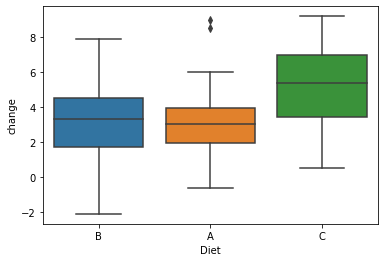

In [ ]:
# boxplot
sns.boxplot(x = "Diet", y = "change", data = diet)
plt.show()

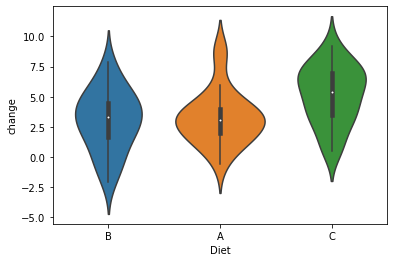

In [ ]:
# violinplot
sns.violinplot(x = "Diet", y = "change", data = diet)
plt.show()

**Q1-4. 시각화 2**

유의미한 평균의 차이를 확인하고, type 간 히스토그램을 한 번에 시각화하세요.

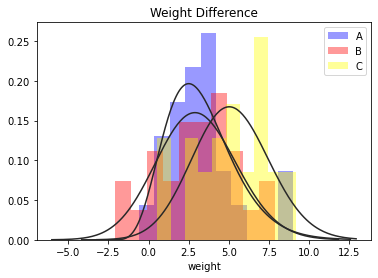

In [ ]:
# histogram
diet_anova = diet.drop(['gender', 'weight', 'weight6weeks'], axis = 1)

type1 = diet_anova[diet_anova['Diet'] == 'A']['change']
type2 = diet_anova[diet_anova['Diet'] == 'B']['change']
type3 = diet_anova[diet_anova['Diet'] == 'C']['change']

ax1 = plt.subplot()
ax1 = sns.distplot(type1, bins = 10, kde = False, fit = stats.gamma, label = "A", color = 'blue')
ax1 = sns.distplot(type2, bins = 10, kde = False, fit = stats.gamma, label = "B", color = 'red')
ax1 = sns.distplot(type3, bins = 10, kde = False, fit = stats.gamma, label = "C", color = 'yellow')
ax1.set(xlabel = "weight", title = "Weight Difference")

plt.legend()
plt.show()


**Q1-5. One-way ANOVA 실행**

세가지 다이어트 식단에 대한 One-way ANOVA를 진행하고, 결과값을 해석하시오.

In [ ]:
# One-way ANOVA

oneway_anova = stats.f_oneway(type1, type2, type3)
oneway_anova

print(f'F-value : {oneway_anova[0]:.4f} p-value : {oneway_anova[1]:.3f}')
if oneway_anova[1] < 0.05:
    print("귀무가설 기각")

print(oneway_anova)

F-value : 6.1974 p-value : 0.003
귀무가설 기각
F_onewayResult(statistic=6.197447453165349, pvalue=0.0032290142385893524)


결과값 해석 : p-value가 0.05보다 작기 때문에 귀무가설을 기각한다.

# 실습 3

다음 데이터에서 자동차의 무게와 연비가 상관관계가 있는지 파악해보자.

**Q1-1. 데이터 불러오기**

seaborn데이터에서 'mpg'데이터를 로드해서 mpg변수에 저장하시오.

hint : sns.load_dataset("data")

In [ ]:
# mpg
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**Q1-2. 데이터셋에 대한 정보를 확인하시오.**


In [ ]:
# info()
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


변수 별 설명

1) mpg: 연비

2) cylinders: 실린더 개수

3) displacement: 배기량

4) horsepower: 마력

5) weight: 무게

6) acceleration: 엔진이 초당 얻을 수 있는 가속력

7) model year: 출시 년도

8) origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)

9) car name: 자동차 이름

**Q1-3. 산점도를 그려 두 변수의 관련성을 파악하고 해석하시오.**

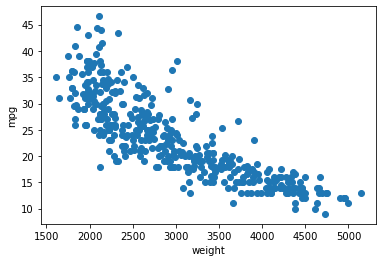

In [ ]:
# scatter
plt.scatter(mpg['weight'],mpg['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

관련성 해석 : 무게가 높을수록 연비가 낮다는 음의 상관관계가 있다.

**Q1-4. 두 변수 간의 관계를 파악할 때 공분산이 아닌, 상관계수를 이용해야하는 이유에 대해 서술하시오.**

이유 : 무게와 연비는 단위가 다르기 때문에 상관계수를 이용해야 한다.

**Q1-5. 두 변수 간의 상관계수를 파악하고 상관계수값이 유의미한지 서술하시오.**

In [ ]:
# pearsonr 함수 활용
corr = stats.pearsonr(mpg['weight'],mpg['mpg'])
print('상관계수 : %.3f, p-value : %.3f' %corr)

상관계수 : -0.832, p-value : 0.000


결과값 해석 : p-value가 0.05이하이므로 유의하며 둘은 음의 상관관계를 가진다.

# 실습 4

다음코드를 실행 후 시작해주세요.

In [ ]:
a=np.arange(1,31)

In [ ]:
#신약(New)과 기존약(Old)을 통해 치료한 후 측정한 환자의 암세포 크기
df_medicine = pd.DataFrame({'person':a,'Old':[23,29,17,22,23,23,19,15,33,20,24,24,23,25,22,19,27,20,30,24,26,27,32,22,21,18,26,14,17,20],'New':[23,11,9,16,17,10,14,13,14,16,20,19,18,17,20,21,19,25,24,28,22,26,21,19,24,15,10,16,24,30]})
df_medicine

,person,Old,New
0,1,23,23
1,2,29,11
2,3,17,9
3,4,22,16
4,5,23,17
5,6,23,10
6,7,19,14
7,8,15,13
8,9,33,14
9,10,20,16


**Q1. df_medicine의 요약 통계량을 나타내시오.**

In [ ]:
df_medicine.describe()

,person,Old,New
count,30.000000,30.000000,30.000000
mean,15.500000,22.833333,18.700000
std,8.803408,4.661532,5.440271
min,1.000000,14.000000,9.000000
25%,8.250000,20.000000,15.250000
50%,15.500000,23.000000,19.000000
75%,22.750000,25.750000,22.750000
max,30.000000,33.000000,30.000000


**Q2. before에 기존약의 값을 array로 저장하고, after에 신약을 사용한 후의 값을 array로 저장하시오.**

In [ ]:
before = np.array(df_medicine['Old'])
after = np.array(df_medicine['New'])

**Q3. 대응표본 t검정의 귀무가설과 대립가설을 서술하시오.**

In [ ]:
# 귀무가설: 신약과 기존약의 치료효과는 동일하다(암세포 크기 감소 효과가 같다.)
# 대립가설: 신약이 기존약보다 치료효과가 뛰어나다(신약의 암세포 크기 감소 효과가 기존약 보다 크다.)

**Q4. before과 after로 대응표본 t검정을 시행하시오. (t-value와 p-value를 각각 소수 5번째 자리까지 구하시오)**

In [ ]:
ttest_result = sp.stats.ttest_rel(after,before)
print('Statistic(t-value):%.5f p-value:%.5f'%ttest_result)

Statistic(t-value):-3.28727 p-value:0.00265


**Q5. 위에서 진행한 대응표본 t검정의 결과를 해석하시오. (유의수준 0.05)**

답 : p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 신약의 치료 효과가 크다는 결론을 내릴 수 있다.


**Q6. 신약이 기존약 보다 평균적으로 암세포 크기를 얼마나 감소시켰는지 구하시오.**

In [ ]:
diff = after - before
diff.mean()

-4.133333333333334

**Q7. before과 after의 히스토그램을 겹쳐 그리시오.**

Text(0.5, 1.0, 'after VS before')

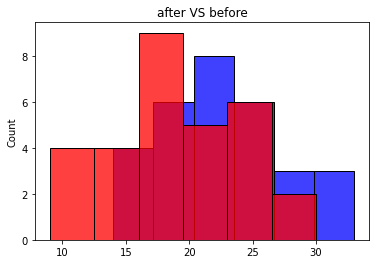

In [ ]:
ax = plt.subplots()
ax = sns.histplot(before,kde=False,label='before',color='blue')
ax = sns.histplot(after,kde=False,label='after',color='red')
plt.title('after VS before')

# 실습 5

아래 코드를 실행시킨 후, 시작해주세요.

In [ ]:
#비트코인 종가와 나스닥 데이터를 불러와 날짜와 종가 부분만 각각 bit와 nas에 저장.(각자 경로에 맞게 설정)
bit = pd.read_csv('/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/실습과제/data/bit1.csv',encoding='cp949')
nas=pd.read_csv('/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/실습과제/data/nas1.csv',encoding='cp949')

In [ ]:
bit=bit.iloc[:,0:2]
nas=nas.iloc[:,0:2]

In [ ]:
bit

,날짜,종가
0,2023-02-26,23204.4
1,2023-02-25,23166.1
2,2023-02-24,23191.5
3,2023-02-23,23936.3
4,2023-02-22,24186.6
...,...,...
392,2022-01-30,37917.7
393,2022-01-29,38170.8
394,2022-01-28,37745.1
395,2022-01-27,37164.3


In [ ]:
nas

,날짜,종가
0,2023-02-24,11394.94
1,2023-02-23,11590.40
2,2023-02-22,11507.07
3,2023-02-21,11492.30
4,2023-02-17,11787.27
...,...,...
267,2022-02-01,14346.00
268,2022-01-31,14239.88
269,2022-01-28,13770.57
270,2022-01-27,13352.78


**Q1. 날짜를 기준으로 bit와 nas를 합치시오.**

In [ ]:
df = pd.merge(bit,nas,on='날짜')
df

,날짜,종가_x,종가_y
0,2023-02-24,23191.5,11394.94
1,2023-02-23,23936.3,11590.40
2,2023-02-22,24186.6,11507.07
3,2023-02-21,24450.7,11492.30
4,2023-02-17,24573.5,11787.27
...,...,...,...
267,2022-02-01,38709.7,14346.00
268,2022-01-31,38498.6,14239.88
269,2022-01-28,37745.1,13770.57
270,2022-01-27,37164.3,13352.78


**Q2. 산점도를 그려서 상관관계를 확인하시오.**

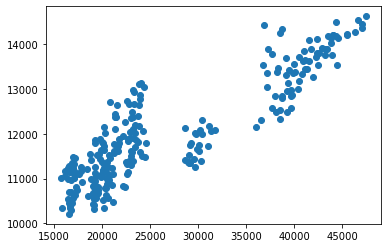

In [ ]:
plt.scatter(df['종가_x'],df['종가_y'])

**Q3. df에서 날짜를 drop하고 비트코인종가와 나스닥 종가 열이름을 각각 bit와 nas로 변경하여 dfall에 저장하시오.**

In [ ]:
dfall = df.drop(columns=['날짜'])

In [ ]:
dfall.columns = ['bit','nas']

**Q5. 나스닥 종가와 비트코인 종가의 상관계수를 구하시오.**

In [ ]:
dfall.corr()

,bit,nas
bit,1.000000,0.886558
nas,0.886558,1.000000


**Q6. 상관계수를 heatmap으로 나타내시오.**

<AxesSubplot:>

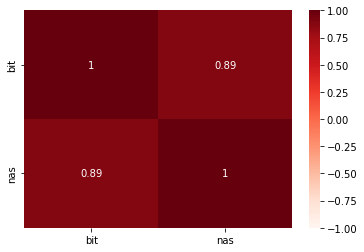

In [ ]:
sns.heatmap(dfall.corr(),
           annot = True, #실제 값 나타내기
           cmap='Reds',
           vmin = -1, vmax=1 , #컬러 영역 -1 ~ +1
          )

**Q7. 상관계수 분석으로 알 수 있는 것을 서술하시오.**

답 : 비트코인 종가와 나스닥 종가의 상관계수는 0.89로 강한 양의 상관관계를 가짐을 알 수 있다.

# 실습 6

아래 코드를 실행 시킨 후 시작해주세요.

In [ ]:
#'iris.txt'파일을 불러와 df에 저장
df = pd.read_csv('/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/1주차_230308/실습과제/data/iris.txt')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#추후 anova 분석 시 column 이름에 있는 . 때문에 오류가 남. 수정 필요
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Species별로 SepalWidth에 차이가 나는지를 일원분산분석을 통해 검정해보시오.

**Q1. 해당 검정에 따른 one-way anova 귀무가설과 대립가설을 서술하시오.**

In [ ]:
# 귀무가설 : Species 간의 SepalWidth는 차이가 나지 않는다.
# 대립가설 : 3개의 Species 중 하나의 그룹(2개의 종) 간이라도 SepalWidth의 차이가 있다.

**Q2. iris 데이터의 기술 통계량을 나타내시오.**

In [ ]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Q3. species별로 sepal.Width에 대해 seaborn을 사용하여 boxplot을 그리시오.**

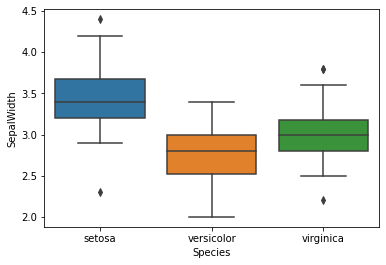

In [ ]:
sns.boxplot(x='Species', y='SepalWidth', data=df)
plt.show()

**Q4. species마다의 히스토그램을 겹쳐 그리시오.**


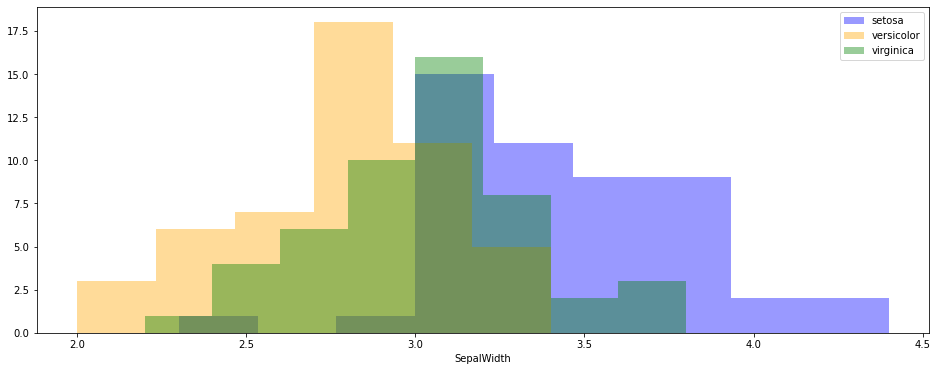

In [ ]:
plt.figure(figsize=(16,6))
type1 = np.array(df[df['Species']=='setosa']['SepalWidth'])
type2 = np.array(df[df['Species']=='versicolor']['SepalWidth'])
type3 = np.array(df[df['Species']=='virginica']['SepalWidth'])

ax1 = sns.distplot(type1, norm_hist=False, kde=False, label='setosa', color='blue')
ax1 = sns.distplot(type2, norm_hist=False, kde=False, label='versicolor', color='orange')
ax1 = sns.distplot(type3, norm_hist=False, kde=False, label='virginica', color='green')

ax1.set(xlabel='SepalWidth')

plt.legend()
plt.show()

**Q5. statsmodel를 활용하여 one-way ANOVA를 실시한 후 검정 결과를 서술하시오.**  

In [ ]:
# 답안1(쉬운 버전)
fit = ols(formula='SepalWidth~C(Species)', data=df).fit()
anova_lm(fit)
# P-value가 0.05보다 작기 때문에 귀무가설을 기각한다.

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [ ]:
# 답안2(모델 사용 버전)
df_model = pd.DataFrame(df, columns=['SepalWidth', 'Species'])
results = ols('SepalWidth~C(Species)', data=df_model).fit()
results.summary()
# P-value가 0.05보다 작기 때문에 귀무가설을 기각한다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SepalWidth   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           4.49e-17
Time:                        22:38:04   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.4280      0.048     71.359      0.000       3.333       3.523
C(Species)[T.versicolor]    -0.6580      0.068     -9.685      0.000      -0.792      -0.524
C(Species)[T.virginica]     -0.4540      0.068     -6.683      0.000      -0.588      -0.320
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.632
Skew:                           0.027   Prob(JB):                        0.442
Kurtosis:                       3.508   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q6. scipy 패키지를 활용해 최소 두가지 이상 방법으로 등분산 검정을 진행하시오.**

In [ ]:
# 등분산 검정 레빈(levene)
levene = stats.levene(type1, type2, type3)
print('levene result(F): %.3f \n p-value: %.3f' %(levene))

#등분산 검정 플리그너
fligner = stats.fligner(type1, type2, type3)
print('fligner result(F): %.3f \n p-value: %.3f' %(fligner))
# 답: 모두 유의수준(0.05) 이상이기 때문에 등분산 가정의 귀무가설은 기각되지 않는다.

levene result(F): 0.590 
 p-value: 0.556
fligner result(F): 0.912 
 p-value: 0.634


**Q7. Tukey HSD로 사후분석을 진행하고 유의미한 차이가 나는 그룹이 무엇인지 서술하시오.**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyhsd = pairwise_tukeyhsd(df['SepalWidth'], df['Species'], alpha=0.05)
tukeyhsd.summary()

# 답: 모든 그룹 간에 유의미한 차이를 보인다.

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.658,0.001,-0.8189,-0.4971,True
setosa,virginica,-0.454,0.001,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0088,0.0431,0.3649,True
